In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import visualise
%load_ext autoreload
%autoreload 2

In [39]:
import audio
import os
from visualise import plot_signal, plot_frequency_response, plot_sample_spectrogram

In [5]:
sample_dir = 'samples'

samples = []
for filename in [f for f in os.listdir('samples') if f.endswith('.aif') or f.endswith('.wav')]:
    sample = audio.load_sample(os.path.join(sample_dir, filename))
    samples.append(sample)
samples = sorted(samples, key=lambda s: s.name)
audio.info_grid(samples)

,name,sr,samples,duration,peak,rms,loudness
0,samples/Cordoba mic 0001 [2024-01-01 141946].aif,48000,4512000,94.00000,0.693207,0.061111,-23.789907
1,samples/Cordoba pickup 0001 [2024-01-01 141947...,48000,4512000,94.00000,0.504333,0.036160,-28.057851
2,samples/Eastman mic 0005 [2023-12-30 160551].aif,48000,768000,16.00000,0.309469,0.043981,-28.174244
3,samples/Eastman mic 0006 [2023-12-30 161352].aif,48000,768000,16.00000,0.083417,0.015638,-37.244074
4,samples/Eastman mic 0008 [2023-12-30 161423].aif,48000,768000,16.00000,0.281032,0.036721,-29.783635
5,samples/Eastman mic 0009 [2023-12-30 162118].aif,48000,768000,16.00000,0.343065,0.042430,-28.412893
6,samples/Eastman mic 0010 [2024-01-01 132750].aif,48000,4128000,86.00000,1.000000,0.085559,-20.167044
7,samples/Eastman piezo 0005 [2023-12-30 160551]...,48000,768000,16.00000,0.332617,0.049556,-26.683516
8,samples/Eastman piezo 0006 [2023-12-30 161352]...,48000,768000,16.00000,0.177042,0.019940,-34.791605
9,samples/Eastman piezo 0008 [2023-12-30 161423]...,48000,768000,16.00000,0.328589,0.034855,-30.076556


In [6]:
source = audio.load_sample('samples/Eastman piezo 0010 [2024-01-01 132751].aif').normalise_loudness(-24)
target = audio.load_sample('samples/Eastman mic 0010 [2024-01-01 132750].aif').normalise_loudness(-24)
ir = audio.create_ir(source, target)
ir2 = audio.create_average_ir(audio.prepare_slices(source, target, 1.0, 0, -24, 0, False, None))

# load test data
test_src = audio.load_sample('samples/Eastman piezo 0009 [2023-12-30 162118].aif').normalise_loudness(-24)
test_target = audio.load_sample('samples/Eastman mic 0009 [2023-12-30 162118].aif').normalise_loudness(-24)
processed_source = test_src.apply_ir(ir)
processed_source2 = test_src.apply_ir(ir2)

raw_diff = audio.distance_between(test_src, test_target)
processed_diff = audio.distance_between(processed_source, test_target)
processed_diff2 = audio.distance_between(processed_source2, test_target)
raw_diff, processed_diff, processed_diff2
# (0.09769917, 0.03417983, 0.03417722203325852)
# (0.09769917, 0.03641074, 0.03841450731975485)

(0.09769917, 0.03641074, 0.03339275)

In [7]:
source.info()

name        samples/Eastman piezo 0010 [2024-01-01 132751]...
sr                                                      48000
samples                                               4128000
duration                                                 86.0
peak                                                 0.618788
rms                                                  0.056181
loudness                                           -23.993426
dtype: object

In [8]:
def accuracy(test_source, test_target, ir):
    return audio.distance_between(test_target, test_source.apply_ir(ir))


def avg_ir_accuracy(name, test_src, test_target, source, target, duration, overlap, norm, thresh, normalise, window_fn):
    return [name,
            accuracy(test_src, test_target,
                     audio.create_average_ir(
                         audio.prepare_slices(source, target, duration, overlap, norm, thresh, normalise, window_fn)
                     ))]


In [9]:
rows = []
rows.append(['raw', audio.distance_between(test_src, test_target)])
rows.append(['simple IR', accuracy(test_src, test_target, audio.create_ir(source, target))])
#rows.append(avg_ir_accuracy('hann', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, True, np.hanning))
#rows.append(avg_ir_accuracy('hamming', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, True, np.hamming))
#rows.append(avg_ir_accuracy('blackman', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, True, np.blackman))
#rows.append(avg_ir_accuracy('kaiser', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, True, lambda n: np.kaiser(n,14)))
#rows.append(avg_ir_accuracy('3s no win, norm', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, True, None))
#rows.append(avg_ir_accuracy('3s no win, no norm, 0.9O 0.3x', test_src, test_target, source, target, 3.0, 0.9, -24, 0.3, False, None))
#rows.append(avg_ir_accuracy('3s no win, no norm, 0.9O 0.1x', test_src, test_target, source, target, 3.0, 0.9, -24, 0.1, False, None))
#rows.append(avg_ir_accuracy('1s no win, no norm, 0.9O 0.1x', test_src, test_target, source, target, 1.0, 0.9, -24, 0.1, False, None))
#rows.append(avg_ir_accuracy('1s no win, no norm, 0O 0.05x', test_src, test_target, source, target, 1.0, 0, -24, 0.05, False, None))
#rows.append(avg_ir_accuracy('3s no win, no norm, 0O 0.1x', test_src, test_target, source, target, 3.0, 0, -24, 0.1, False, None))
#rows.append(avg_ir_accuracy('5s no win, no norm, 0O 0.1x', test_src, test_target, source, target, 5.0, 0, -24, 0.1, False, None))
#rows.append(avg_ir_accuracy('3s no win, no norm, 0.5O 0.3x', test_src, test_target, source, target, 3.0, 0.5, -24, 0.3, False, None))
#rows.append(avg_ir_accuracy('1s no win, no norm, 0O 0.1x', test_src, test_target, source, target, 1.0, 0, -24, 0.1, False, None))
#rows.append(avg_ir_accuracy('1s blackman, no norm, 0O 0.1x', test_src, test_target, source, target, 1.0, 0, -24, 0.1, False, np.blackman))
#rows.append(avg_ir_accuracy('2s no win, no norm, 0O 0x', test_src, test_target, source, target, 2.0, 0, -24, 0, False, None))
#rows.append(avg_ir_accuracy('0.5s no win, no norm, 0O 0x', test_src, test_target, source, target, 0.5, 0, -24, 0, False, None))

# BEST:
rows.append(
    avg_ir_accuracy('1s no win, no norm, 0O 0x', test_src, test_target, source, target, 1.0, 0, -24, 0, False, None))

pd.DataFrame(rows, columns=['test', 'error'])


,test,error
0,raw,0.097699
1,simple IR,0.036411
2,"1s no win, no norm, 0O 0x",0.033393


In [10]:
basic_ir = audio.create_ir(source, target)
best_ir = audio.create_average_ir(audio.prepare_slices(source, target, 1.0, 0, -24, 0, False, None))

basic_processed=test_src.apply_ir(basic_ir)
best_processed=test_src.apply_ir(best_ir)

,name,sr,samples,duration,peak,rms,loudness
0,samples/Eastman piezo 0010 [2024-01-01 132751]...,48000,4128000,86.0,0.618788,0.056181,-23.993426
1,samples/Eastman mic 0010 [2024-01-01 132750].a...,48000,4128000,86.0,0.643209,0.055033,-24.000000
2,samples/Eastman piezo 0009 [2023-12-30 162118]...,48000,768000,16.0,0.475734,0.069731,-24.000000
3,samples/Eastman mic 0009 [2023-12-30 162118].a...,48000,768000,16.0,0.570192,0.070521,-24.000000
4,processed samples/Eastman piezo 0009 [2023-12-...,48000,768000,16.0,0.593065,0.077544,-23.229601
5,processed samples/Eastman piezo 0009 [2023-12-...,48000,768000,16.0,0.487466,0.061729,-25.233128


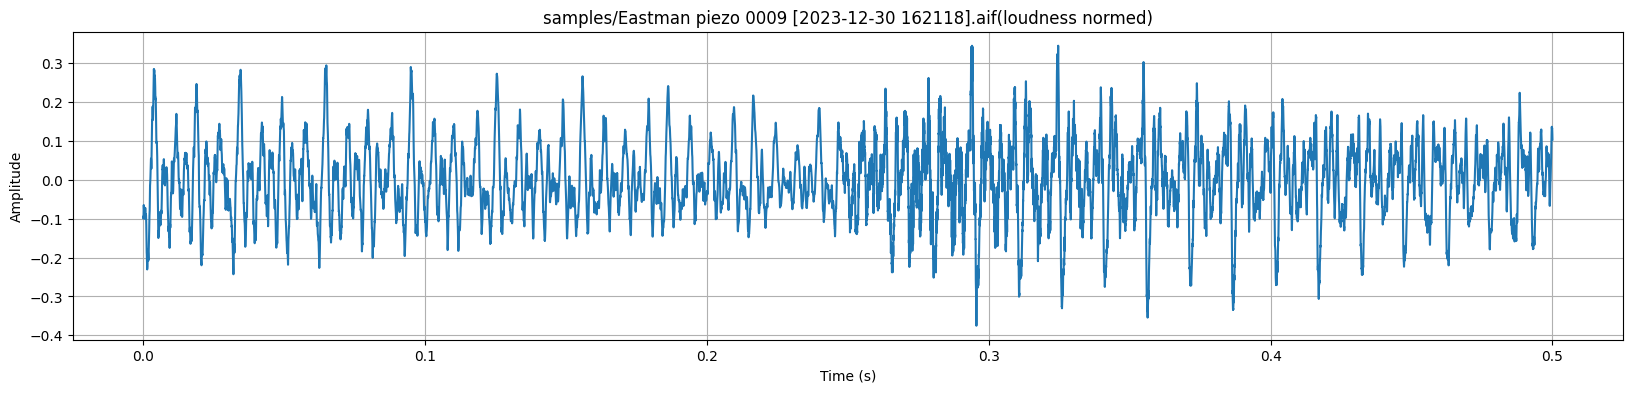

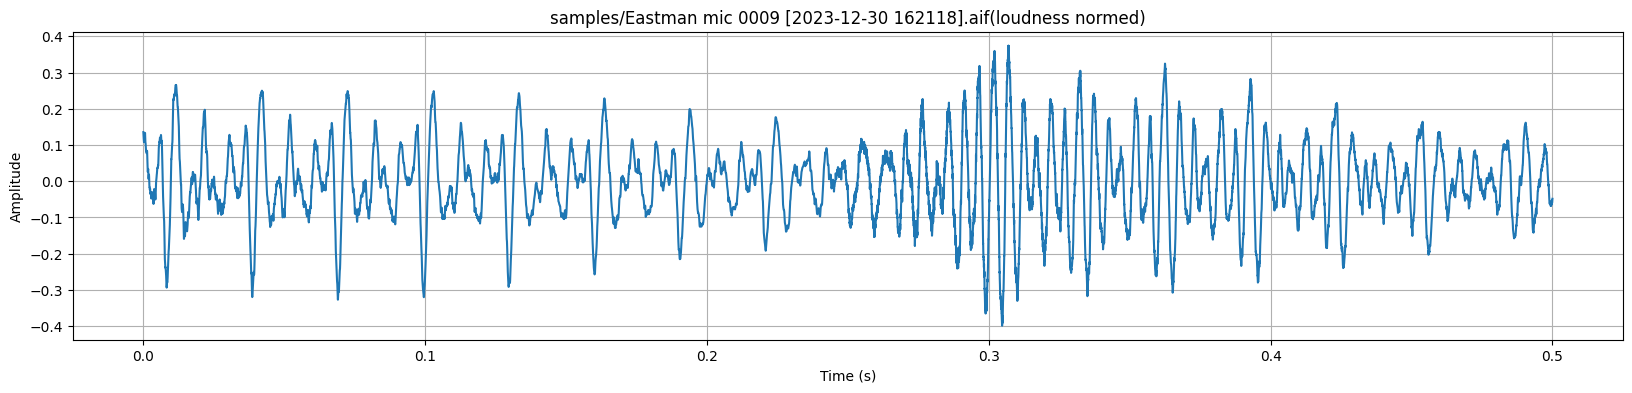

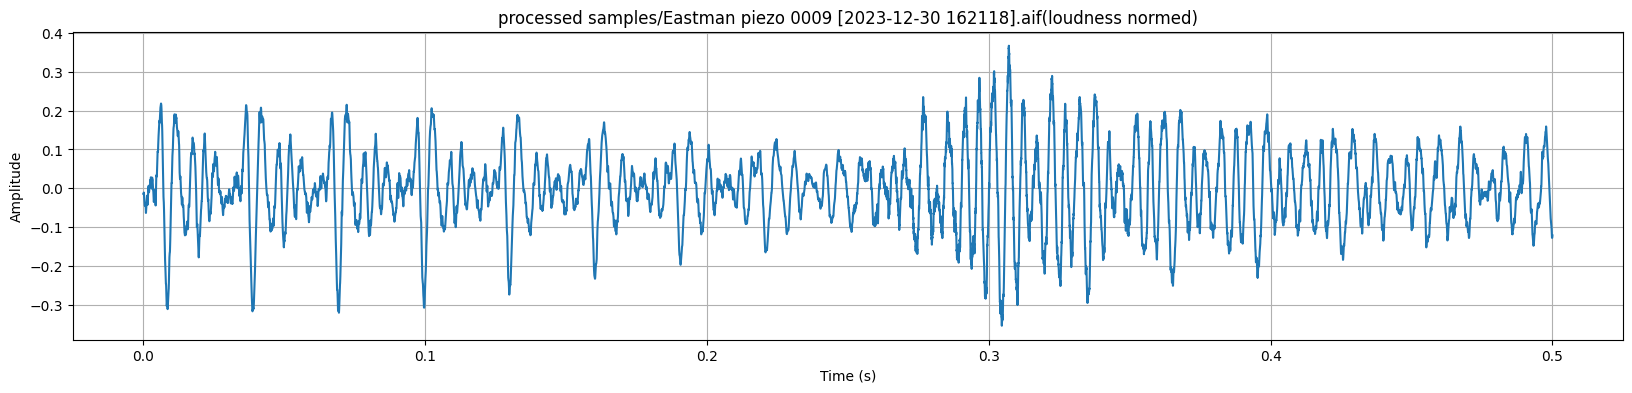

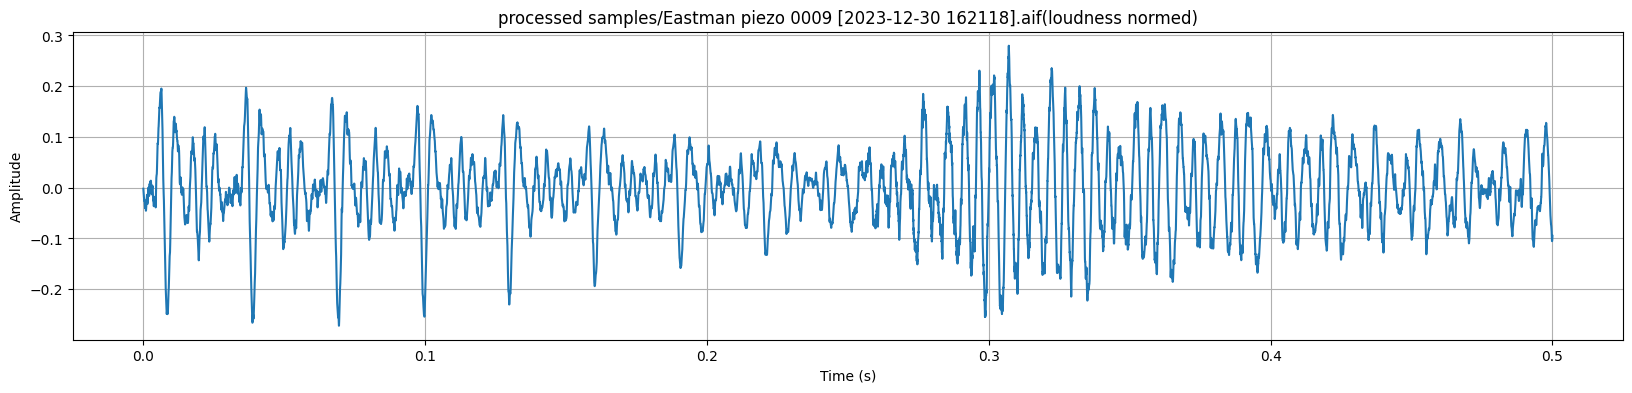

In [11]:
START = 520000
LENGTH = 24000
plot_signal(test_src, start=START, length=LENGTH)
plot_signal(test_target, start=START, length=LENGTH)
plot_signal(basic_processed, start=START, length=LENGTH, label='basic ir')
plot_signal(best_processed, start=START, length=LENGTH, label='best ir')
audio.info_grid([source, target, test_src, test_target, basic_processed, best_processed])

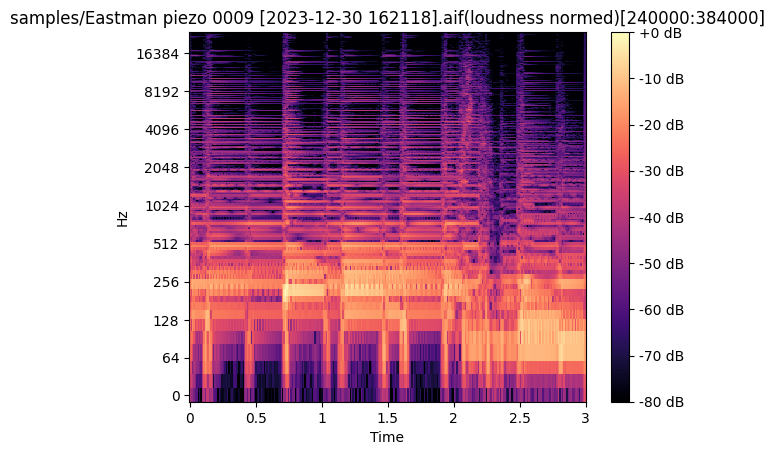

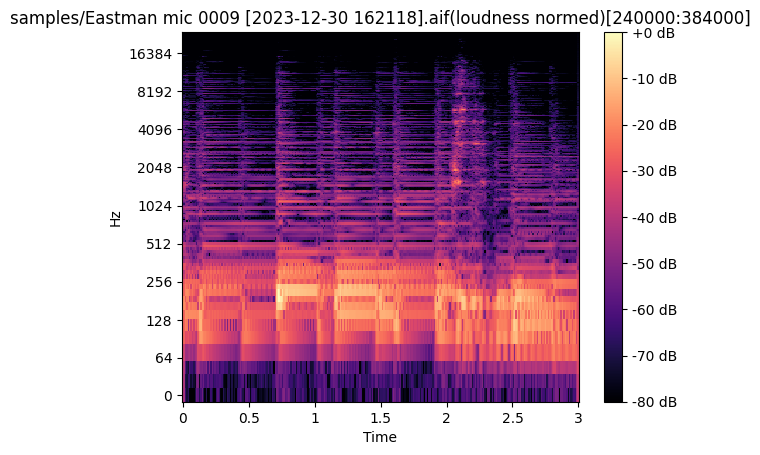

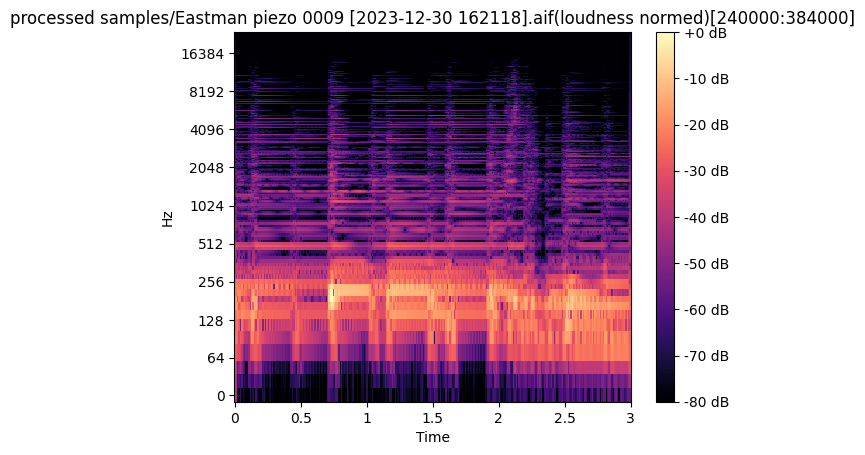

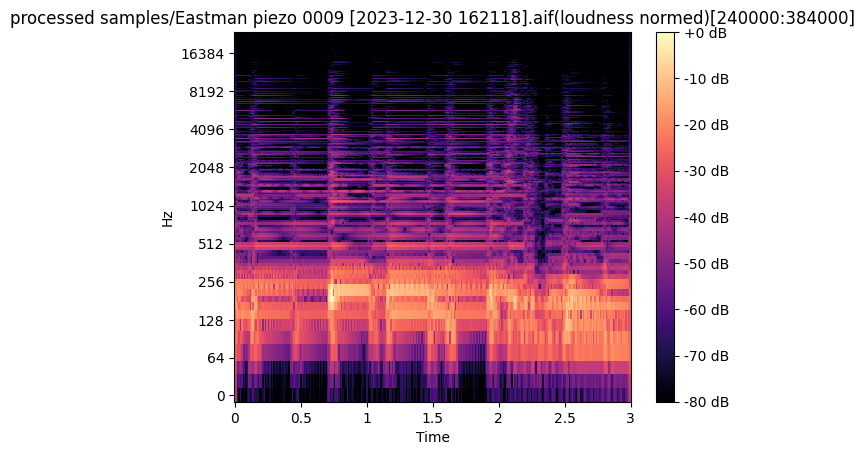

In [30]:
plot_sample_spectrogram(test_src.slice_by_duration(5, 8))
plot_sample_spectrogram(test_target.slice_by_duration( 5, 8))
plot_sample_spectrogram(processed_source.slice_by_duration(5,8))
plot_sample_spectrogram(processed_source2.slice_by_duration(5,8))


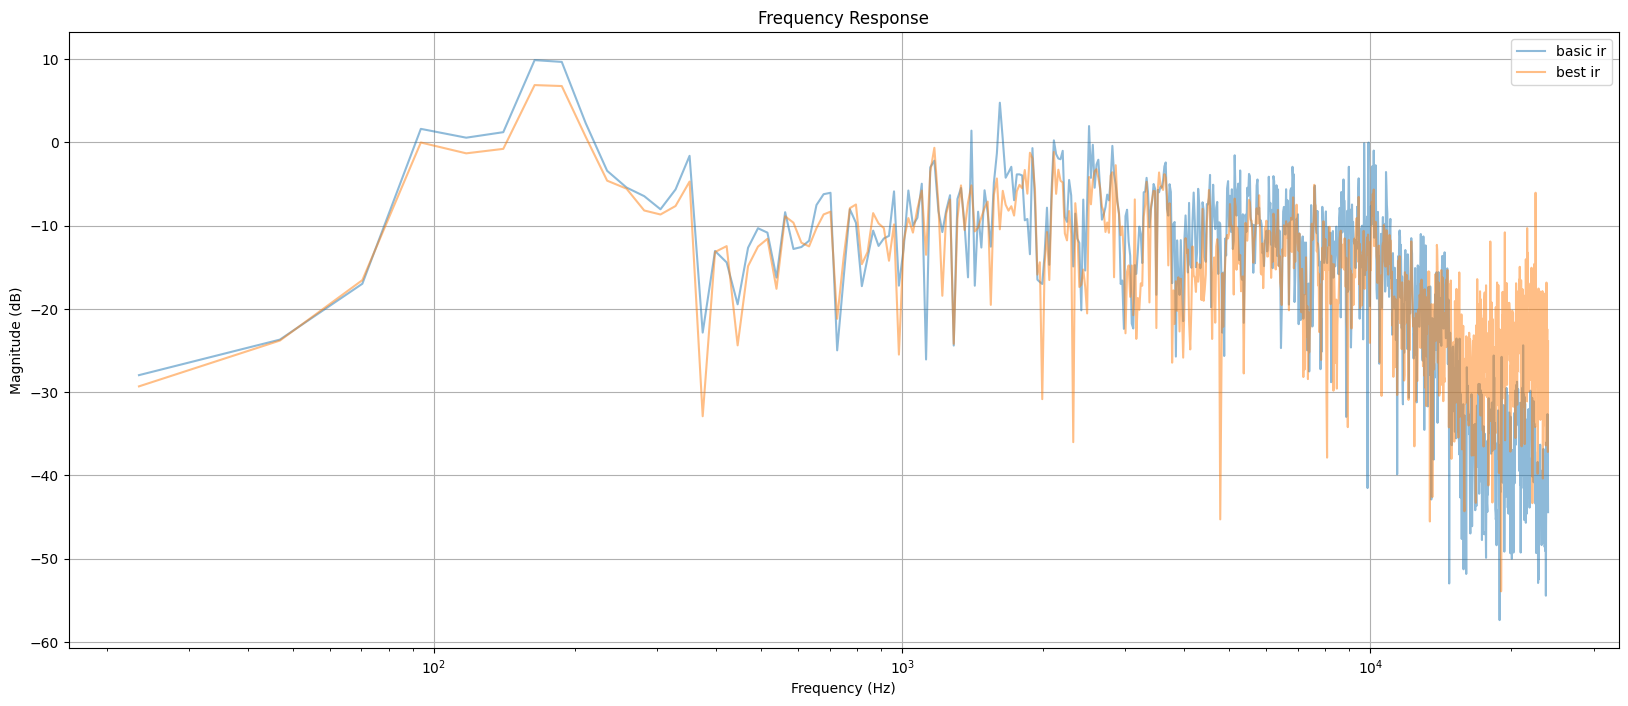

In [40]:
plt.figure(figsize=(20, 8))
plot_frequency_response(basic_ir, source.sr, label='basic ir', logscale=True)
plot_frequency_response(best_ir, source.sr, label='best ir', logscale=True)
plt.grid()
plt.legend()

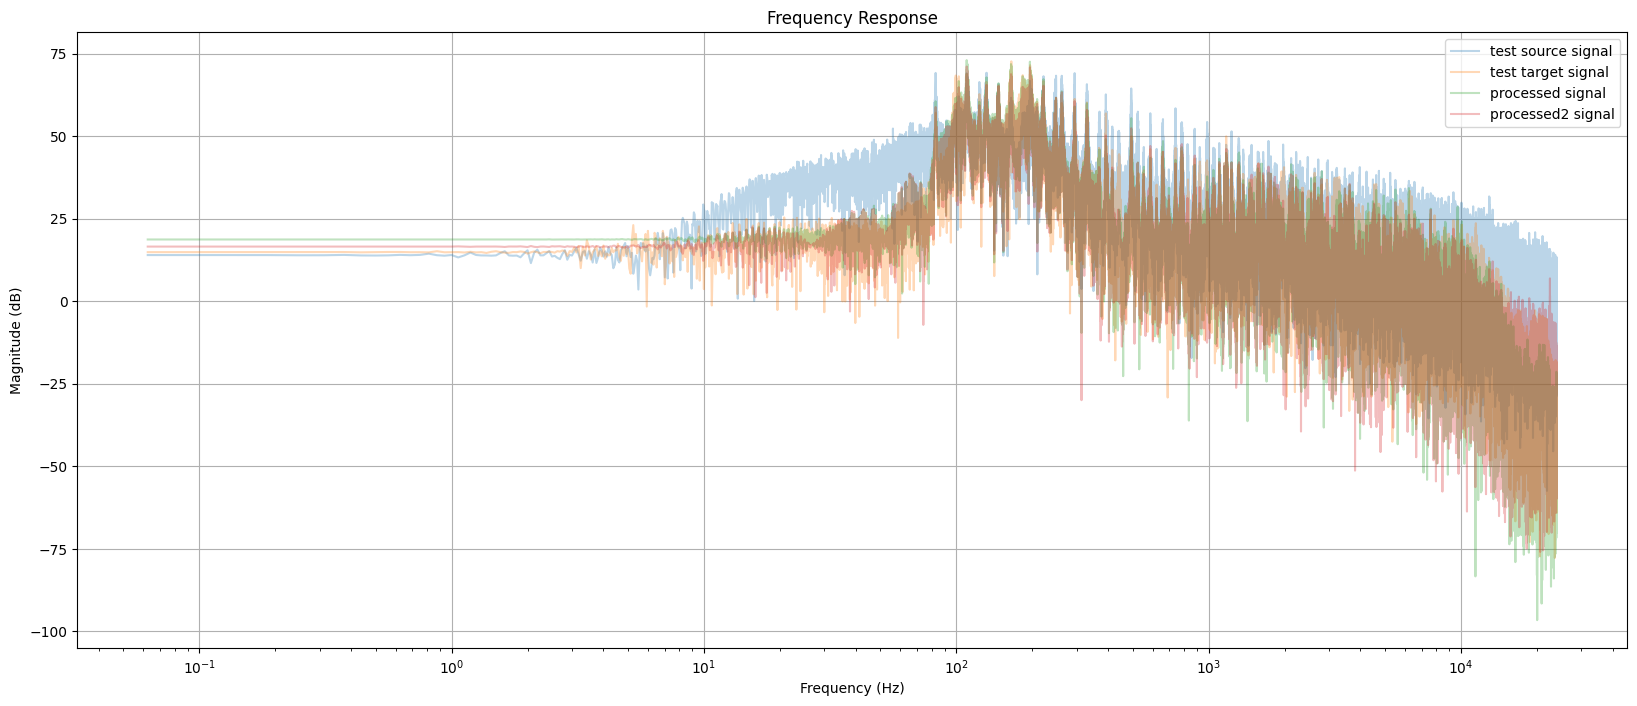

In [42]:
plt.figure(figsize=(20, 8))
plot_frequency_response(test_src.signal, test_src.sr, label='test source signal', logscale=True)
plot_frequency_response(test_target.signal, test_target.sr, label='test target signal', logscale=True)
plot_frequency_response(processed_source.signal, processed_source.sr, label='processed signal', logscale=True)
plot_frequency_response(processed_source2.signal, processed_source2.sr, label='processed2 signal', logscale=True)
plt.grid()
plt.legend()

name        samples/Norman piezo 0003b.wav
sr                                   48000
samples                            1824000
duration                              38.0
peak                              0.229114
rms                               0.016812
loudness                        -34.620805
dtype: object

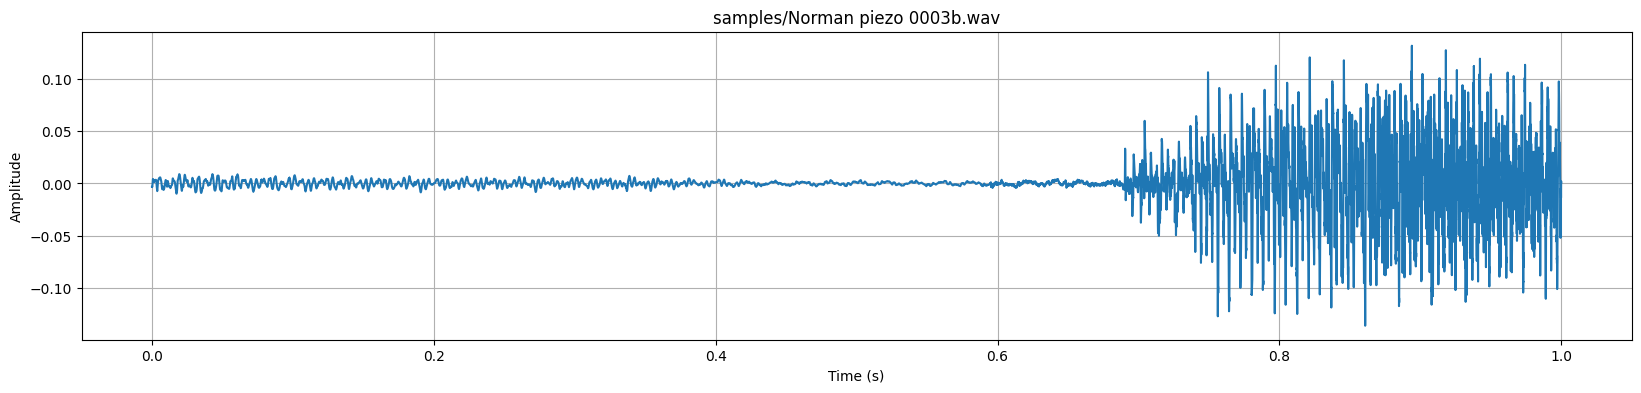

In [43]:
sample2 = samples[17]
plot_signal(sample2, start=audio.duration_to_samples(0, sample2.sr), length=audio.duration_to_samples(1, sample2.sr))
sample2.info()

In [44]:
slices = source.slices(3.0, 0.9)
df = audio.info_grid(slices)

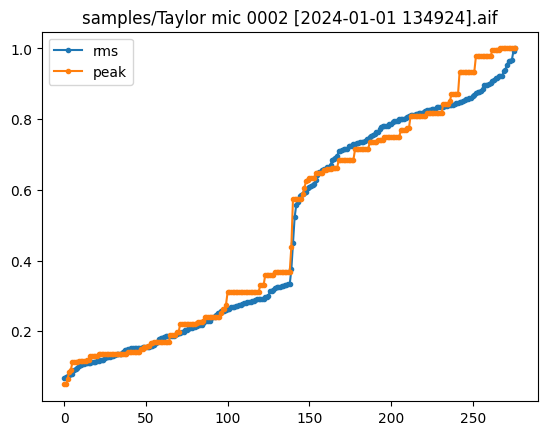

In [45]:
plt.title(sample.name)
plt.plot(np.array(sorted([s.rms for s in slices])) / df.rms.max(), '.-', label='rms')
plt.plot(np.array(sorted([s.peak for s in slices])) / df.peak.max(), '.-', label='peak')
plt.legend()

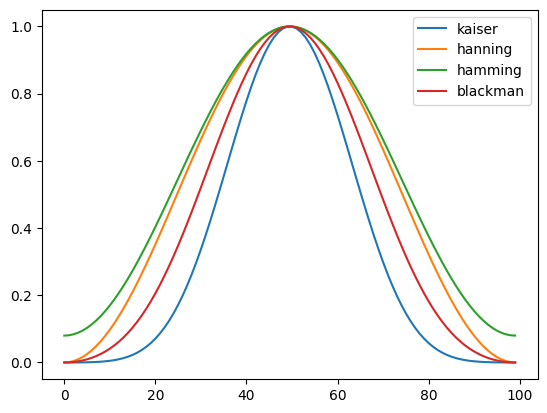

In [46]:
plt.plot(np.kaiser(100, 14), label='kaiser')
plt.plot(np.hanning(100), label='hanning')
plt.plot(np.hamming(100), label='hamming')
plt.plot(np.blackman(100), label='blackman')
plt.legend()

In [47]:
slice = slices[8]

In [48]:
slice

[samples/Eastman piezo 0010 [2024-01-01 132751].aif(loudness normed)   9/277 48000khz 3.00s]

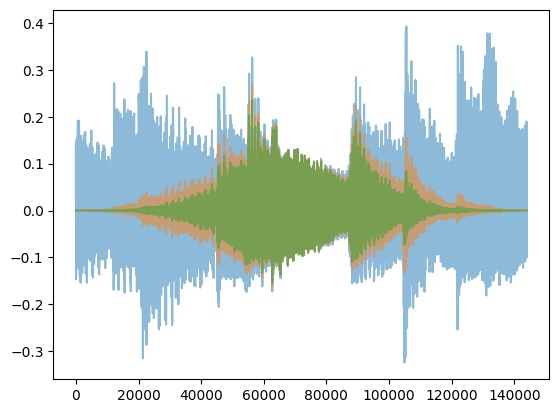

In [51]:
plt.plot(slice.signal,alpha=0.5)
plt.plot(slice.signal * np.blackman(len(slice.signal)), alpha=0.5)
plt.plot(slice.signal * np.kaiser(len(slice.signal), 14), alpha=0.5)



In [52]:
sample

[samples/Taylor mic 0002 [2024-01-01 134924].aif 48000khz 74.00s]

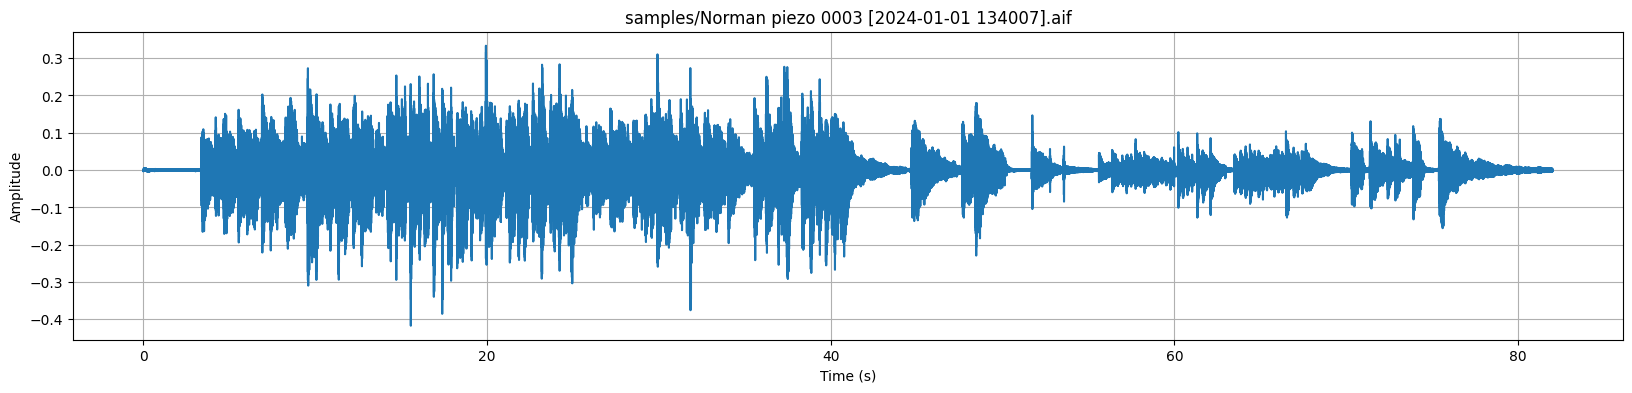

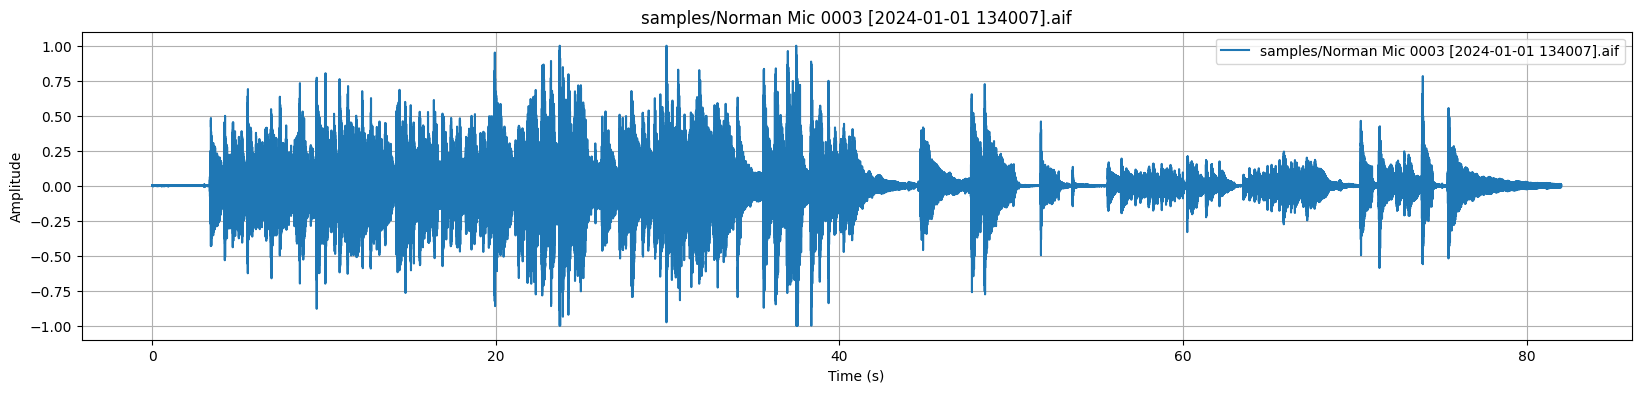

In [53]:
sample = audio.load_sample('samples/Norman piezo 0003 [2024-01-01 134007].aif')
sample2 = audio.load_sample('samples/Norman Mic 0003 [2024-01-01 134007].aif')

plot_signal(sample, label=sample.name)
plot_signal(sample2, label=sample2.name)
plt.legend()

([processed samples/Norman piezo 0003a.wav 48000khz 44.00s],
 [processed samples/Norman piezo 0003b.wav 48000khz 38.00s])

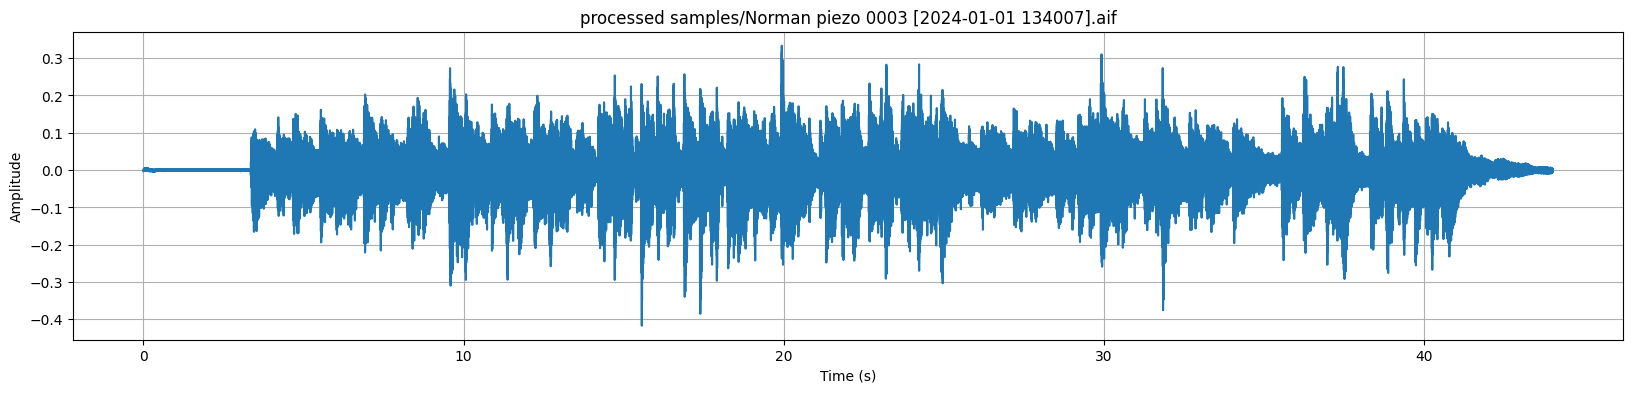

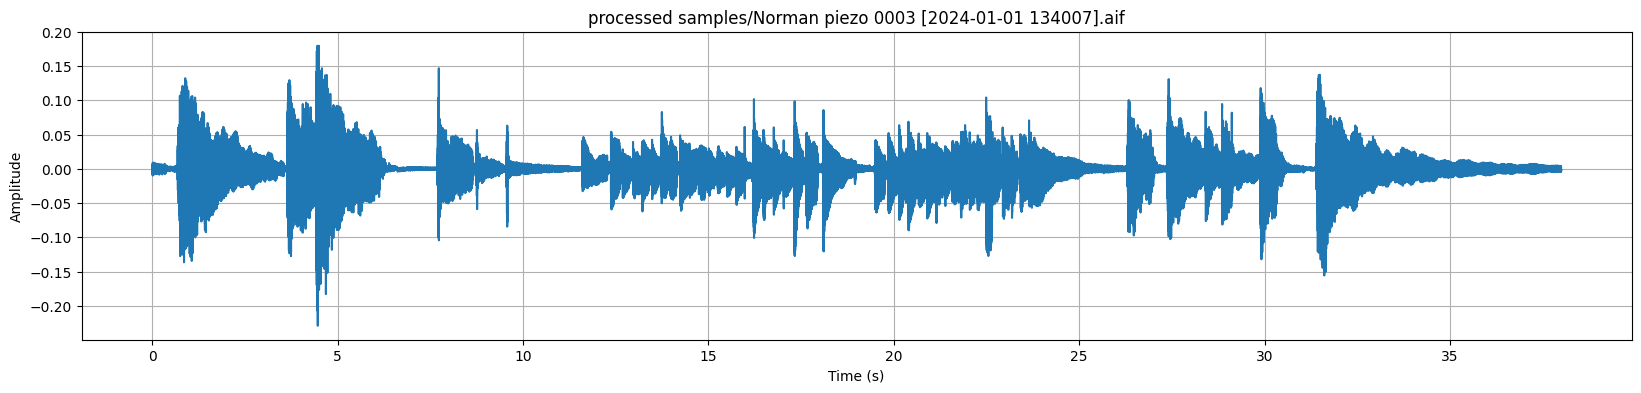

In [54]:
s1, s2 = sample.split_at(44)
plot_signal(s1)
plot_signal(s2)
s1.name = s1.name.replace('0003 [2024-01-01 134007].aif', '0003a.wav')
s2.name = s2.name.replace('0003 [2024-01-01 134007].aif', '0003b.wav')
# s1.save_as(s1.name)
# s2.save_as(s2.name)
s1, s2

([processed samples/Norman Mic 0003a.wav 48000khz 44.00s],
 [processed samples/Norman Mic 0003b.wav 48000khz 38.00s])

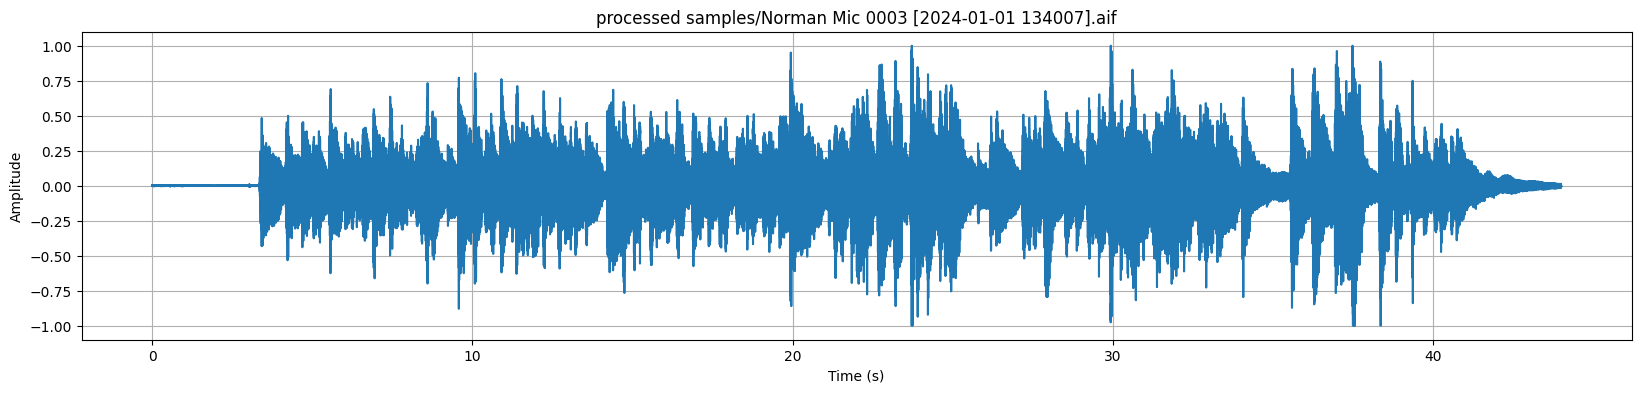

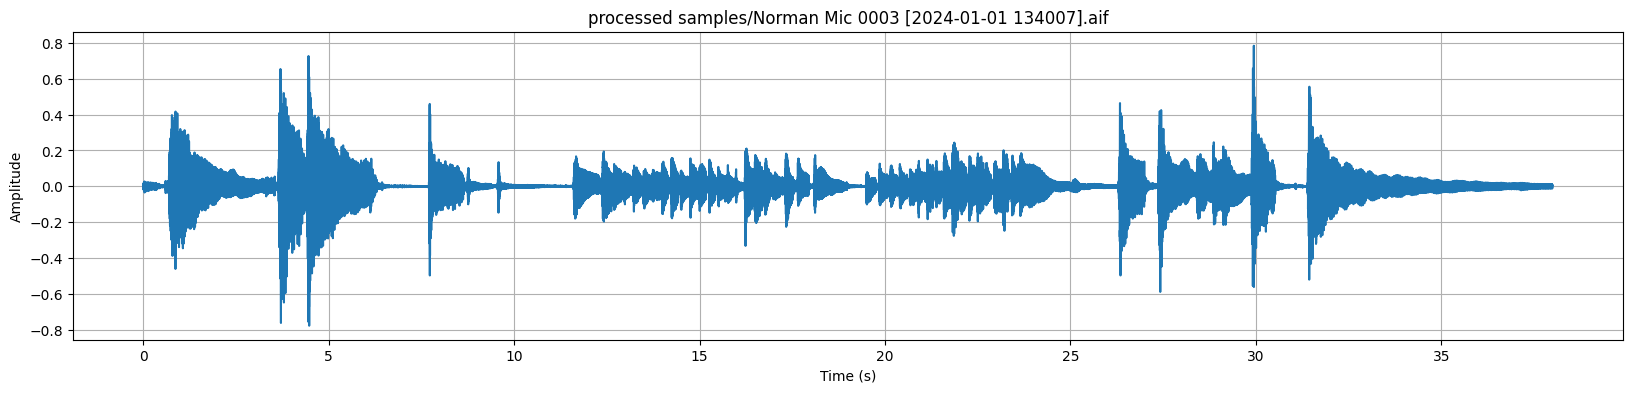

In [55]:
s1, s2 = sample2.split_at(44)
plot_signal(s1)
plot_signal(s2)
s1.name = s1.name.replace('0003 [2024-01-01 134007].aif', '0003a.wav')
s2.name = s2.name.replace('0003 [2024-01-01 134007].aif', '0003b.wav')
# s1.save_as(s1.name)
# s2.save_as(s2.name)
s1, s2